In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import scipy.stats as st

## **CPI / Inflation Data**

In [69]:
# Read file into a Pandas DataFrame
csv_path = "In_use_data/CPI_ All_Urban_Consumers_all_items.csv"
cpi_df = pd.read_csv(csv_path)
cpi_df.head()
# drop series ID, convert period to months, convert year to "22" using replace function, merge year and period

,series id,year,period,value,footnotes
0,CUUR0000SA0,2022,M12,296.797,
1,CUUR0000SA0,2022,M11,297.711,
2,CUUR0000SA0,2022,M10,298.012,
3,CUUR0000SA0,2022,M09,296.808,
4,CUUR0000SA0,2022,M08,296.171,


In [74]:
cpi_df['Date'] = cpi_df[' period '] + '-' + cpi_df[' year '].astype(str)
cpi_df.head()

,series id,year,period,value,footnotes,Date
0,CUUR0000SA0,2022,M12,296.797,,M12 -2022
1,CUUR0000SA0,2022,M11,297.711,,M11 -2022
2,CUUR0000SA0,2022,M10,298.012,,M10 -2022
3,CUUR0000SA0,2022,M09,296.808,,M09 -2022
4,CUUR0000SA0,2022,M08,296.171,,M08 -2022


##  **Unemployment Data**

In [76]:
# Read file into a Pandas DataFrame
csv_path = "In_use_data/Unemployment_Rate_formatted_2.csv"
unemployment_df = pd.read_csv(csv_path)
unemployment_df
unemployment_df.head()

#drop unnamed rows, 

,Year,Month,Unemployment Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2013.0,Jan,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013.0,Feb,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013.0,Mar,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013.0,Apr,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013.0,May,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# flip rows and columns 

#unemployment_df.set_index("Year", inplace=True, drop=True)
#unemployment_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1


In [39]:
unemployment_transpose = unemployment_df.transpose()
unemployment_transpose.head()

,0,1,2,3,4,5,6,7,8,9,10
Year,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
Jan,8.0,6.6,5.7,4.8,4.7,4.0,4.0,3.5,6.3,4.0,3.4
Feb,7.7,6.7,5.5,4.9,4.6,4.1,3.8,3.5,6.2,3.8,3.6
Mar,7.5,6.7,5.4,5.0,4.4,4.0,3.8,4.4,6.1,3.6,NaN
Apr,7.6,6.2,5.4,5.1,4.4,4.0,3.6,14.7,6.1,3.6,NaN


In [49]:
test = unemployment_transpose.iloc[[0]].transpose(copy=False)
#test_2 = pd.concat([unemployment_transpose, test], axis=1)
test

,Year
0,2013.0
1,2014.0
2,2015.0
3,2016.0
4,2017.0
5,2018.0
6,2019.0
7,2020.0
8,2021.0
9,2022.0


## **Interest Rate Data**

In [82]:
# Read file into a Pandas DataFrame
csv_path = "Interest_Rate_Data/REAINTRATREARAT10Y_2.csv"
interest_rate = pd.read_csv(csv_path)
interest_rate.head()

,observation_date,REAINTRATREARAT10Y
0,Jan-13,0.084401
1,Feb-13,0.172100
2,Mar-13,0.050341
3,Apr-13,-0.024212
4,May-13,-0.019391


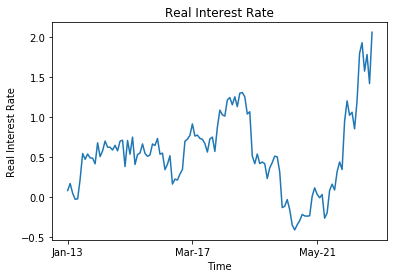

In [85]:
# Plot interest rate
ir_date = interest_rate["observation_date"]
ir_value = interest_rate["REAINTRATREARAT10Y"]

tick_spacing = 50

fig, ax = plt.subplots(1,1)
ax.plot(ir_date,ir_value)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Time")
plt.ylabel("Real Interest Rate")
plt.title("Real Interest Rate")
plt.show()